In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_csv("../cleaned_csvs/Data_2017.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71272 entries, 0 to 71271
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           71272 non-null  int64  
 1   FL_DATE              71272 non-null  object 
 2   OP_UNIQUE_CARRIER    71272 non-null  object 
 3   ORIGIN               71272 non-null  object 
 4   ORIGIN_CITY_NAME     71272 non-null  object 
 5   DEST                 71272 non-null  object 
 6   DEST_CITY_NAME       71272 non-null  object 
 7   CRS_DEP_TIME         71272 non-null  int64  
 8   DEP_DELAY            70245 non-null  float64
 9   DEP_DELAY_NEW        70245 non-null  float64
 10  ARR_TIME             70201 non-null  float64
 11  ARR_DELAY            70094 non-null  float64
 12  ARR_DELAY_NEW        70094 non-null  float64
 13  CANCELLED            71272 non-null  float64
 14  CARRIER_DELAY        12195 non-null  float64
 15  WEATHER_DELAY        12195 non-null 

In [4]:
# Delete Unwated Columns

del data_df['Unnamed: 0']
del data_df['ORIGIN_CITY_NAME']
del data_df['DEST_CITY_NAME']
del data_df['ARR_TIME']
del data_df['DEP_DELAY']
del data_df['ARR_DELAY']
del data_df['ARR_DELAY_NEW']
del data_df['CRS_DEP_TIME']

data_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
0,2017-01-01,EV,IAH,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
1,2017-01-01,EV,IAH,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
2,2017-01-01,EV,CLE,EWR,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
3,2017-01-01,EV,CLE,IAH,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
4,2017-01-01,EV,CLE,EWR,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71267,2017-12-31,EV,MSP,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,12
71268,2017-12-31,EV,CLE,LGA,49.0,0.0,31.0,0.0,0.0,0.0,0.0,2017,12
71269,2017-12-31,EV,LGA,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,12
71270,2017-12-31,EV,CLE,DTW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,12


In [5]:
# FLights Departing from Cleveland Airport "CLE"

dep_cle_df=data_df.loc[data_df["ORIGIN"] =="CLE"]
dep_cle_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
2,2017-01-01,EV,CLE,EWR,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
3,2017-01-01,EV,CLE,IAH,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
4,2017-01-01,EV,CLE,EWR,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
6,2017-01-01,DL,CLE,ATL,3.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
9,2017-01-01,DL,CLE,ATL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71262,2017-12-31,OO,CLE,ORD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,12
71264,2017-12-31,OO,CLE,ORD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,12
71266,2017-12-31,AA,CLE,CLT,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,12
71268,2017-12-31,EV,CLE,LGA,49.0,0.0,31.0,0.0,0.0,0.0,0.0,2017,12


In [6]:
dep_cle_df['OP_UNIQUE_CARRIER'].unique()

array(['EV', 'DL', 'WN', 'NK', 'AA', 'F9', 'B6', 'UA', 'OO'], dtype=object)

In [7]:
# Add unique carrier name column
# create dict of unique_carrier codes to names
# map to unique_carrier column to transform values to strings
# carrier names were acquired from BTS statistics definitions

unique_carrier_dict = {'F9':'Frontier','DL':'Delta',
                       'NK':'Spirit','EV':'ExpressJet','OO':'SkyWest Airlines',
                       'UA':'United','AA':'American Airlines',
                       'B6':'JetBlue','WN':'Southwest Airlines'}

#map dict to unique_carrier column

dep_cle_df['unique_carrier_nm'] = dep_cle_df['OP_UNIQUE_CARRIER'].map(unique_carrier_dict)

#view final dataframe on flight origin and destination

dep_cle_df.head()

/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
2,2017-01-01,EV,CLE,EWR,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1,ExpressJet
3,2017-01-01,EV,CLE,IAH,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1,ExpressJet
4,2017-01-01,EV,CLE,EWR,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1,ExpressJet
6,2017-01-01,DL,CLE,ATL,3.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1,Delta
9,2017-01-01,DL,CLE,ATL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,1,Delta


In [8]:
# Clear NaNs

dep_clean_df = dep_cle_df.fillna(0)
dep_clean_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
2,2017-01-01,EV,CLE,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet
3,2017-01-01,EV,CLE,IAH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet
4,2017-01-01,EV,CLE,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet
6,2017-01-01,DL,CLE,ATL,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,Delta
9,2017-01-01,DL,CLE,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,Delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71262,2017-12-31,OO,CLE,ORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,12,SkyWest Airlines
71264,2017-12-31,OO,CLE,ORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,12,SkyWest Airlines
71266,2017-12-31,AA,CLE,CLT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,12,American Airlines
71268,2017-12-31,EV,CLE,LGA,49.0,0.0,31.0,0.0,0.0,0.0,0.0,2017,12,ExpressJet


In [9]:
fligh_per_carrier_df = dep_clean_df.groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Number of flights per Carrier')
fligh_per_carrier_df

,Airline,Number of flights per Carrier
0,American Airlines,2468
1,Delta,2998
2,ExpressJet,9233
3,Frontier,3160
4,JetBlue,1385
5,SkyWest Airlines,1961
6,Southwest Airlines,6213
7,Spirit,2874
8,United,5341


<function matplotlib.pyplot.show(*args, **kw)>

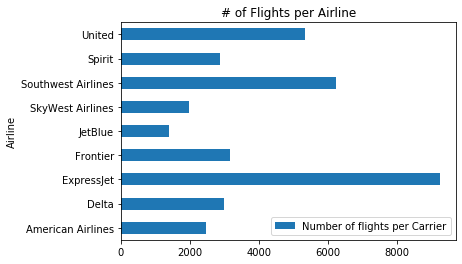

In [10]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('../delays/plots/Number of Flights per Airline - 2017.jpg',bbox_inches='tight', dpi=150)
plt.show

In [11]:
# Create a column with Ontime, Late Cancelled status

dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW <= 15, "Flight Status"]="OnTime"
dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW > 15, "Flight Status"]="Late"
dep_clean_df.loc[dep_clean_df.CANCELLED == 1, "Flight Status"]="Cancelled"
dep_clean_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
2,2017-01-01,EV,CLE,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet,OnTime
3,2017-01-01,EV,CLE,IAH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet,OnTime
4,2017-01-01,EV,CLE,EWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet,OnTime
6,2017-01-01,DL,CLE,ATL,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,Delta,OnTime
9,2017-01-01,DL,CLE,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,Delta,OnTime


In [12]:
# Count Flight Status

flightstatus_df = dep_clean_df.groupby('Flight Status')['Flight Status'].count()
flightstatus_df

Flight Status
Cancelled      532
Late          5388
OnTime       29713
Name: Flight Status, dtype: int64

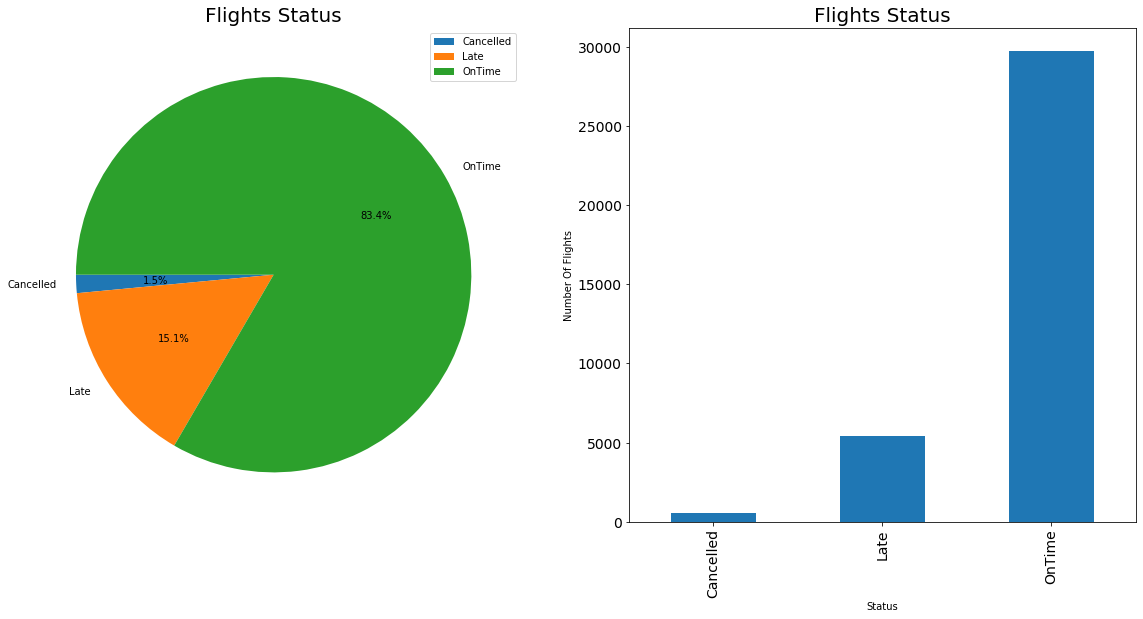

In [13]:
# Plot FLight Status

fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(flightstatus_df, labels=flightstatus_df.index, startangle=180, autopct='%1.1f%%')
ax.set_title("Flights Status", fontsize=20);
plt.gcf().gca()
plt.legend()

ax2 = fig.add_subplot(222)
ax2.set_title("Flights Status", fontsize=20);
ax2.set_facecolor('white')
flightstatus_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=14)
plt.xlabel('Status')
plt.ylabel('Number Of Flights')
plt.savefig('../delays/plots/Flight status - 2017.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [14]:
# Flitering flights by delays > 15 min

delays_df = dep_clean_df.loc[dep_clean_df['DEP_DELAY_NEW'] > 15]
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
47,2017-01-01,NK,CLE,LAX,44.0,0.0,0.0,0.0,40.0,0.0,0.0,2017,1,Spirit,Late
67,2017-01-01,F9,CLE,LAS,35.0,0.0,26.0,0.0,0.0,0.0,0.0,2017,1,Frontier,Late
72,2017-01-01,F9,CLE,PHX,231.0,0.0,222.0,0.0,13.0,0.0,0.0,2017,1,Frontier,Late
73,2017-01-01,B6,CLE,BOS,17.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,JetBlue,Late
113,2017-01-01,EV,CLE,LGA,33.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,1,ExpressJet,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71199,2017-12-31,WN,CLE,BWI,17.0,0.0,0.0,0.0,0.0,16.0,0.0,2017,12,Southwest Airlines,Late
71204,2017-12-31,WN,CLE,MDW,25.0,0.0,0.0,0.0,23.0,25.0,0.0,2017,12,Southwest Airlines,Late
71206,2017-12-31,WN,CLE,MDW,26.0,0.0,0.0,0.0,29.0,26.0,0.0,2017,12,Southwest Airlines,Late
71237,2017-12-31,EV,CLE,DCA,92.0,0.0,77.0,0.0,0.0,0.0,0.0,2017,12,ExpressJet,Late


In [15]:
# Grouping delayed flights by carrier

groupby_df = delays_df.groupby(['unique_carrier_nm'])['DEP_DELAY_NEW'].count()
groupby_df

unique_carrier_nm
American Airlines      298
Delta                  332
ExpressJet            1723
Frontier               557
JetBlue                268
SkyWest Airlines       289
Southwest Airlines     847
Spirit                 539
United                 543
Name: DEP_DELAY_NEW, dtype: int64

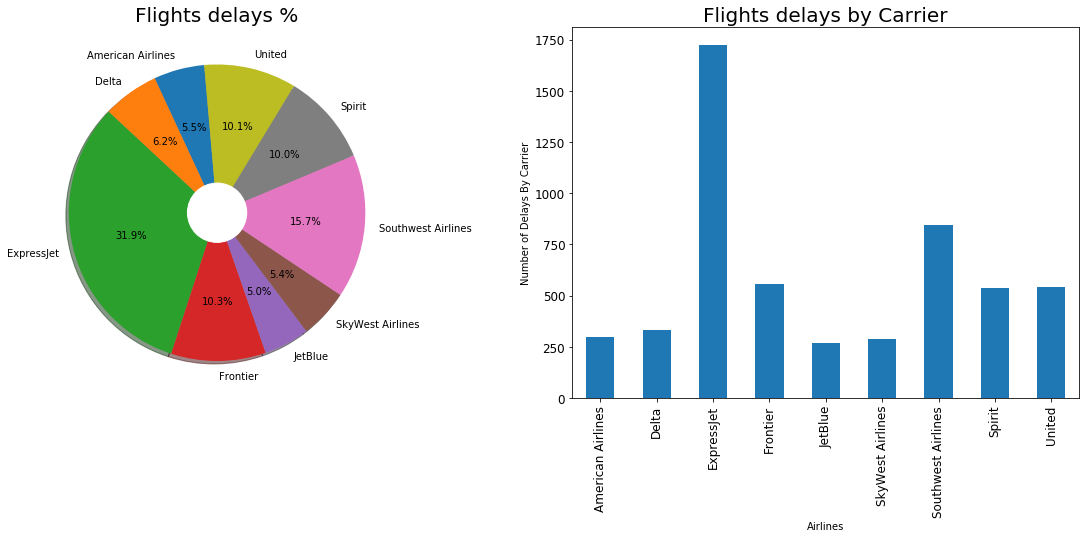

In [16]:
# Plot Delayed flights by carrier

fig = plt.figure(figsize=[20, 15])
ax = fig.add_subplot(221)
ax.pie(groupby_df, labeldistance=1.1, labels=groupby_df.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights delays %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights delays by Carrier", fontsize=20);
ax2.set_facecolor('white')
groupby_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.xlabel('Airlines')
plt.ylabel('Number of Delays By Carrier')
plt.savefig('../delays/plots/Flights delays by Carrier - 2017.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [17]:
# Filter Delays by category

# Carrier Delays

delays_df[delays_df['CARRIER_DELAY'] > 15]['CARRIER_DELAY'].count()

1370

In [18]:
carrier_delays_df = delays_df.loc[delays_df['CARRIER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Carrier Delays')
carrier_delays_df

,Airline,Carrier Delays
0,American Airlines,105
1,Delta,94
2,ExpressJet,531
3,Frontier,138
4,JetBlue,75
5,SkyWest Airlines,49
6,Southwest Airlines,139
7,Spirit,129
8,United,110


In [19]:
# Weather Delays

delays_df[delays_df['WEATHER_DELAY'] > 15]['WEATHER_DELAY'].count()

121

In [20]:
weather_delays_df = delays_df.loc[delays_df['WEATHER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Weather Delays')
weather_delays_df

,Airline,Weather Delays
0,American Airlines,5
1,Delta,14
2,ExpressJet,15
3,Frontier,3
4,JetBlue,5
5,SkyWest Airlines,4
6,Southwest Airlines,40
7,Spirit,14
8,United,21


In [21]:
# NAS Delays

delays_df[delays_df['NAS_DELAY'] > 15]['NAS_DELAY'].count()

1331

In [22]:
nas_delays_df = delays_df.loc[delays_df['NAS_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='NAS Delays')
nas_delays_df

,Airline,NAS Delays
0,American Airlines,36
1,Delta,30
2,ExpressJet,601
3,Frontier,91
4,JetBlue,61
5,SkyWest Airlines,42
6,Southwest Airlines,67
7,Spirit,196
8,United,207


In [23]:
# Security Delays

delays_df[delays_df['SECURITY_DELAY'] > 15]['SECURITY_DELAY'].count()

14

In [24]:
security_delays_df = delays_df.loc[delays_df['SECURITY_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Security Delays')
security_delays_df

,Airline,Security Delays
0,American Airlines,2
1,Southwest Airlines,12


In [25]:
#Late Aircraft Delays

delays_df[delays_df['LATE_AIRCRAFT_DELAY'] > 15]['LATE_AIRCRAFT_DELAY'].count()

2084

In [26]:
late_aircaft_df = delays_df.loc[delays_df['LATE_AIRCRAFT_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Late Aircraft Delays')
late_aircaft_df

,Airline,Late Aircraft Delays
0,American Airlines,127
1,Delta,110
2,ExpressJet,602
3,Frontier,232
4,JetBlue,131
5,SkyWest Airlines,183
6,Southwest Airlines,385
7,Spirit,155
8,United,159


In [27]:
# Merge Delays per Category

merge = pd.merge(carrier_delays_df, weather_delays_df)
merge2 = pd.merge(merge, nas_delays_df)
merge3 =pd.merge(merge2, late_aircaft_df)
merge4 = pd.merge(merge3, security_delays_df, how='outer')
delays_category = merge4.fillna(0)
delays_category

,Airline,Carrier Delays,Weather Delays,NAS Delays,Late Aircraft Delays,Security Delays
0,American Airlines,105,5,36,127,2.0
1,Delta,94,14,30,110,0.0
2,ExpressJet,531,15,601,602,0.0
3,Frontier,138,3,91,232,0.0
4,JetBlue,75,5,61,131,0.0
5,SkyWest Airlines,49,4,42,183,0.0
6,Southwest Airlines,139,40,67,385,12.0
7,Spirit,129,14,196,155,0.0
8,United,110,21,207,159,0.0


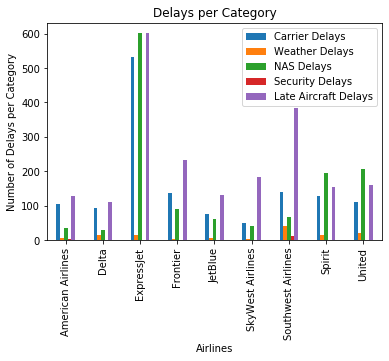

In [28]:
# Plot Delays by category

delays_category.plot(x="Airline", y=["Carrier Delays", "Weather Delays", "NAS Delays", "Security Delays", "Late Aircraft Delays"], kind="bar")
plt.xlabel('Airlines')
plt.ylabel('Number of Delays per Category')
plt.title('Delays per Category')
plt.savefig('../delays/plots/Delays per category - 2017.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [29]:
# Flights By Month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

monthly_flights_df = dep_clean_df.groupby(['month'])['month'].count()
monthly_flights_df


/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


month
1     2609
2     2361
3     2793
4     2780
5     3063
6     3140
7     3189
8     3336
9     3226
10    3239
11    2972
12    2925
Name: month, dtype: int64

In [30]:
# Delays by month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

month_delay = delays_df.groupby(['month'])['DEP_DELAY_NEW'].count()
month_delay

month
01-Jan      481
02-Feb      277
03-March    477
04-Apr      480
05-May      527
06-Jun      607
07-Jul      597
08-Aug      450
09-Sep      355
10-Oct      332
11-Nov      274
12-Dec      539
Name: DEP_DELAY_NEW, dtype: int64

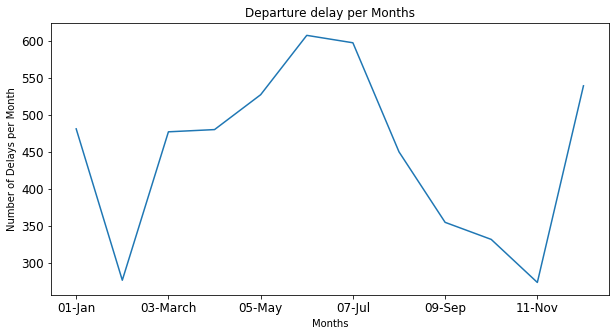

In [31]:
month_delay.plot(figsize=[10,5], title ="Departure delay per Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.xlabel('Months')
plt.ylabel('Number of Delays per Month')
plt.savefig('../delays/plots/Number of Delays per Month - 2017.jpg',bbox_inches='tight', dpi=150)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

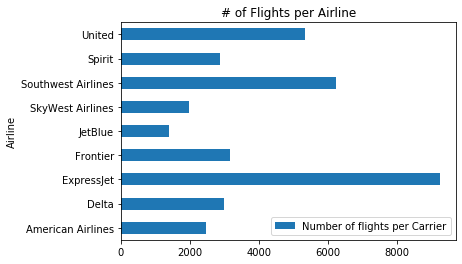

In [32]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('../delays/plots/Number of Flights per Airline - 2017.jpg',bbox_inches='tight', dpi=150)
plt.show